<a href="https://colab.research.google.com/github/juancaalcaraz/practicaML/blob/main/TensorFlow_1x_Vs_2x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TensorFlow**
## TensorFlow está creado alrededor de un grafo computacional compuesto de un cojunto de nodos. Cada nodo representa una operación con cero o más entradas o salidas. los valores que fluyen a travéz de los bordes del grafo computacional se denominan tensores.
## Los tensores se pueden interpretar como una generalización de escalares, vectores, matrices, etc. Un escalar se puede definir como un tensor de rango 0, un vector como un tensor de rango 1, una matriz como un tensor de rango 2; y las matrices dispuestas en una tercera dimensión, como tensores de rango 3.
## Una vez creado un grafo computacional, el grafo se puede lanzar en una *Session* de TensorFlow para ejecutar diferentes nodos del grafo.    

In [ ]:
import tensorflow as tf
"""
################################################################
##                                                            ##
## Calcular una entrad de red Z de un punto de muestra X      ##
## en un conjunto de una dimensión con de pesos W y sesgos b. ##
##                                                            ##
################################################################
"""
## Crear un gráfico
g = tf.Graph()

with g.as_default():
  x = tf.compat.v1.placeholder(dtype=tf.float32, shape=(1), name='x')
  w = tf.Variable(2.0, name='weight')
  b = tf.Variable(0.7, name='bias')
  z = w * x + b
  init = tf.compat.v1.global_variables_initializer()

## Crear una sesión y pasar a gráfico g
with tf.compat.v1.Session(graph=g) as sess:
  ## inicializar w y b
  sess.run(init)
  ## Evaluar Z
  for t in [1.0, 0.6, -1.8]:
    print('x=%4.1f --> z=%4.1f'%(t, sess.run(z, feed_dict={x: [t]})))

x= 1.0 --> z= 2.7
x= 0.6 --> z= 1.9
x=-1.8 --> z=-2.9


<ipython-input-6-182fce8a40f8>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('x=%4.1f --> z=%4.1f'%(t, sess.run(z, feed_dict={x: [t]})))


## El código anterior es para TensorFlow 1.x Actualmente se utiliza la version 2.x que introduce algunos cambios.
1. Uso de Variables directamente: No es necesario inicializar las variables con tf.compat.v1.global_variables_initializer() en TensorFlow 2.x, ya que la inicialización se maneja automáticamente cuando se crean las variables.
2. Funciones en lugar de gráficos: En lugar de definir un gráfico (tf.Graph) y una sesión (tf.compat.v1.Session), se define una función (compute_z) que se evalúa directamente.
3. Ejecución directa: En TensorFlow 2.x, puedes llamar directamente a las operaciones y obtener los resultados sin necesidad de feed_dict o sesiones explícitas.

## Actualización del código anterior:

In [ ]:
import tensorflow as tf

# Definir las variables y la operación
w = tf.Variable(2.0, name='weight')
b = tf.Variable(0.7, name='bias')

# Función para calcular z
def compute_z(x):
    return w * x + b

# Inicializar las variables
tf.keras.backend.set_floatx('float32')  # Asegurarse de que las operaciones se realicen en 32 bits (opcional)
for t in [1.0, 0.6, -1.8]:
    z = compute_z(tf.constant(t))
    print(f'x={t:.1f} --> z={z.numpy():.1f}')


x=1.0 --> z=2.7
x=0.6 --> z=1.9
x=-1.8 --> z=-2.9


## Trabajar con estructuras de matri en TensorFlow 1.x
## Crearemos un tensor de rango 3 con un *batchsize* x 2 x 3, lo remodelaresmos y calcularemos las sumas de columnas utilizando expresiones optimizadas de TensorFlow. Como no conocemos de antemano el tamaño del lote, lo especificamos con None en el argumento para el parámetro shape del marcador de posición *x*:    

In [ ]:
import tensorflow as tf
import numpy as np
g = tf.Graph()

with g.as_default():
  x = tf.compat.v1.placeholder(dtype=tf.float32, shape=(None, 2, 3), name='input_x')
  x2 = tf.reshape(x, shape=(-1, 6), name='x2')

  ## Calcular la suma de cada columna
  xsum = tf.reduce_sum(x2, axis=0, name='col_sum')

  ## Calcular la media de cada columna
  xmean = tf.reduce_mean(x2, axis=0, name='col_mean')

with tf.compat.v1.Session(graph=g) as sess:
  x_array = np.arange(18).reshape(3, 2, 3)
  print('input shape: ', x_array.shape)
  print('Reshaped: \n ', sess.run(x2, feed_dict={x: x_array}))
  print('Column Sums: ', sess.run(xsum, feed_dict={x: x_array}))
  print('Column Means: ', sess.run(xmean, feed_dict={x: x_array}))

input shape:  (3, 2, 3)
Reshaped: 
  [[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10. 11.]
 [12. 13. 14. 15. 16. 17.]]
Column Sums:  [18. 21. 24. 27. 30. 33.]
Column Means:  [ 6.  7.  8.  9. 10. 11.]


## Trabajar con estrucuturas de matriz en tensorflow 2.x
## Este código realiza lo mismo que el anterior pero está refactorizado para tensorflow 2.x

In [ ]:
import tensorflow as tf
import numpy as np

# Crear un modelo secuencial
model = tf.keras.Sequential()

# Definir las operaciones como funciones
@tf.function
def reshape_and_calculate(x):
    x2 = tf.reshape(x, shape=(-1, 6))
    xsum = tf.reduce_sum(x2, axis=0)
    xmean = tf.reduce_mean(x2, axis=0)
    return x2, xsum, xmean

# Crear los datos de entrada
x_array = np.arange(18).reshape(3, 2, 3).astype(np.float32)

# Ejecutar las operaciones
x2, xsum, xmean = reshape_and_calculate(x_array)

print('Input shape: ', x_array.shape)
print('Reshaped: \n', x2.numpy())
print('Column Sums: ', xsum.numpy())
print('Column Means: ', xmean.numpy())


Input shape:  (3, 2, 3)
Reshaped: 
 [[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10. 11.]
 [12. 13. 14. 15. 16. 17.]]
Column Sums:  [18. 21. 24. 27. 30. 33.]
Column Means:  [ 6.  7.  8.  9. 10. 11.]


### En estos ejemplos hemos trabajado con tres funciones tf.reshape, tf.reduce_sum y tf.reduce_mean. Para el remodelado utilizamos el valor -1 para la primera dimensión. Esto es así porque no conocemos el valor del tamaño del lote. Cuando se remodela un tensor si se utiliza -1 para una dimensión determinada, el tamaño de dicha dimensión será calculada según el tamaño total del tensor y la dimension restante. Por lo cual, tf.reshape(tensor, shape=(-1, )) se puede utilizar para aplanar un tensor.   

# Desarrollar un modelo simple conn la API de bajo nivel de TensorFlow
## Vamos a implementar una regresion de minimos **cuadrados ordinales(OLS)**.
## Crearemos un conjunto de datos para el entrenamientos. Una vez tengamos el conjunto de datos vamos a enrenar un modelo de regresión lineal para predecir la salida $y$ desde la entrada $x$. A continuación, debemos definir las variables a entrenar: pesos $w$ y sesgos $b$. Despúes definimos el modelo de regresión lineal como $ z = W $X$ x + b $ y definir la función de coste que sea el **Error cuadrático medio(MSE)**.
## El código en TensorFlow 1.x:  

In [ ]:
import tensorflow as tf
import numpy as np
X_train = np.arange(10).reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0])

class TfLinreg(object):
  def __init__(self, x_dim, learning_rate=0.01, random_seed=None):
    self.x_dim = x_dim
    self.learning_rate = learning_rate
    self.g = tf.Graph()
    ## Crear el modelo
    with self.g.as_default():
      ## Ajustar graph-level random-seed
      if random_seed :
        tf.random.set_seed(random_seed)
      self.build()
      ## Crear inicializador
      self.init_op = tf.compat.v1.global_variables_initializer()

  def build(self):
    ## Definir texto por defecto para entradas.
    self.X = tf.compat.v1.placeholder(dtype=tf.float32, shape=(None, self.x_dim), name='x_input')
    self.y = tf.compat.v1.placeholder(dtype=tf.float32, shape=(None), name='y_input')
    print(self.X)
    print(self.y)
    ## Definir matriz ponderada y vector de sesgo
    w = tf.Variable(tf.zeros(shape=(1)), name='weight')
    b = tf.Variable(tf.zeros(shape=(1)), name='bias')
    print(w)
    print(b)
    self.z_net = tf.squeeze(w * self.X + b, name='z_net')
    print(self.z_net)
    ## definir la funcion de coste.
    sqr_errors = tf.square(self.y - self.z_net, name='sqr_errors')
    print(sqr_errors)
    self.mean_cost = tf.reduce_mean(sqr_errors, name='mean_cost')
    print(self.mean_cost)
    ## Definir el optimizador
    optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate = self.learning_rate, name='GradientDescent')
    self.optimizer = optimizer.minimize(self.mean_cost)

In [ ]:
lrmodel = TfLinreg(x_dim=X_train.shape[1], learning_rate=0.01)

Tensor("x_input:0", shape=(None, 1), dtype=float32)
Tensor("y_input:0", dtype=float32)
<tf.Variable 'weight:0' shape=(1,) dtype=float32>
<tf.Variable 'bias:0' shape=(1,) dtype=float32>
Tensor("z_net:0", dtype=float32)
Tensor("sqr_errors:0", dtype=float32)
Tensor("mean_cost:0", shape=(), dtype=float32)


## Para el entranamiento implementamos una funcion individual que necesita una session de TensorFlow, una instancia del modelo, datos de entrenamiento y el número de epocas para el entrenamiento:

In [ ]:
def train_linreg(sess, model, X_train, y_train, num_epochs=10):
  ## Inicializar todas las variables W y b
  sess.run(model.init_op)
  training_costs = []
  for i in range(num_epochs):
    _, cost = sess.run([model.optimizer, model.mean_cost], feed_dict={model.X: X_train, model.y: y_train})
    training_costs.append(cost)

  return training_costs

In [ ]:
sess = tf.compat.v1.Session(graph=lrmodel.g)
training_costs = train_linreg(sess, lrmodel, X_train, y_train)

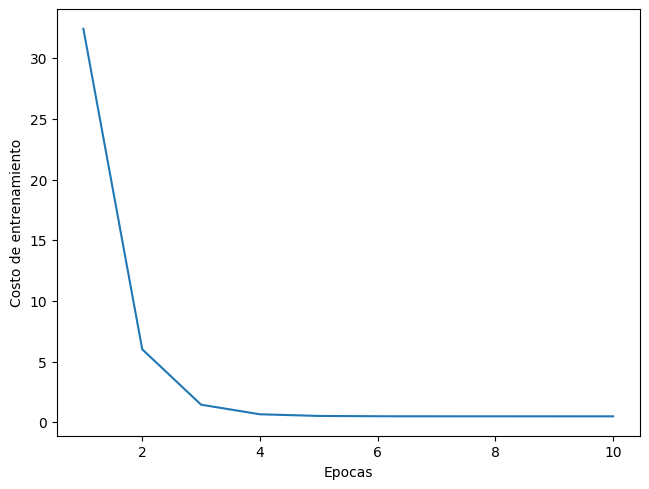

In [ ]:
# Vamos a visualizar los costes de entrenamiento.
import matplotlib.pyplot as plt
plt.plot(range(1, len(training_costs)+1), training_costs)
plt.tight_layout()
plt.xlabel('Epocas')
plt.ylabel('Costo de entrenamiento')
plt.show()

## Como podemos ver, este modelo converge rápidamente despúes de unas épocas.

# Mismo código en TensorFlow 2.x

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Datos de entrenamiento
X_train = np.arange(10).reshape((10, 1)).astype(np.float32)
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0], dtype=np.float32)

class TfLinreg(tf.Module):
    def __init__(self, x_dim, learning_rate=0.01, random_seed=None):
        self.x_dim = x_dim
        self.learning_rate = learning_rate
        if random_seed:
            tf.random.set_seed(random_seed)
        self.build()

    def build(self):
        self.w = tf.Variable(tf.zeros(shape=(1)), name='weight')
        self.b = tf.Variable(tf.zeros(shape=(1)), name='bias')

    def __call__(self, X):
        return tf.squeeze(self.w * X + self.b)

    def compute_cost(self, y_true, y_pred):
        sqr_errors = tf.square(y_true - y_pred)
        return tf.reduce_mean(sqr_errors)

# Crear el modelo
model = TfLinreg(x_dim=1, learning_rate=0.01, random_seed=42)

# Definir el optimizador
optimizer = tf.optimizers.SGD(learning_rate=model.learning_rate)

# Función de entrenamiento
def train_step(model, X, y):
    with tf.GradientTape() as tape:
        y_pred = model(X)
        loss = model.compute_cost(y, y_pred)
    gradients = tape.gradient(loss, [model.w, model.b])
    optimizer.apply_gradients(zip(gradients, [model.w, model.b]))
    return loss

# Lista para almacenar los costes de entrenamiento
training_costs = []

# Entrenamiento del modelo
for epoch in range(100):
    loss = train_step(model, X_train, y_train)
    training_costs.append(loss.numpy())
    if epoch % 10 == 0:
        print(f'Epoch {epoch}: Loss = {loss.numpy()}')

# Resultados finales
print(f'Peso: {model.w.numpy()}, Sesgo: {model.b.numpy()}')



Epoch 0: Loss = 32.430999755859375
Epoch 10: Loss = 0.48512163758277893
Epoch 20: Loss = 0.4763002395629883
Epoch 30: Loss = 0.4684240221977234
Epoch 40: Loss = 0.46139150857925415
Epoch 50: Loss = 0.45511192083358765
Epoch 60: Loss = 0.44950467348098755
Epoch 70: Loss = 0.44449830055236816
Epoch 80: Loss = 0.44002777338027954
Epoch 90: Loss = 0.4360359311103821
Peso: [0.9935169], Sesgo: [0.40870973]


## En esta versión, utilizamos tf.Module para definir el modelo y tf.GradientTape para calcular los gradientes y actualizar los pesos. La función train_step realiza un paso de entrenamiento y se ejecuta en un bucle para entrenar el modelo.

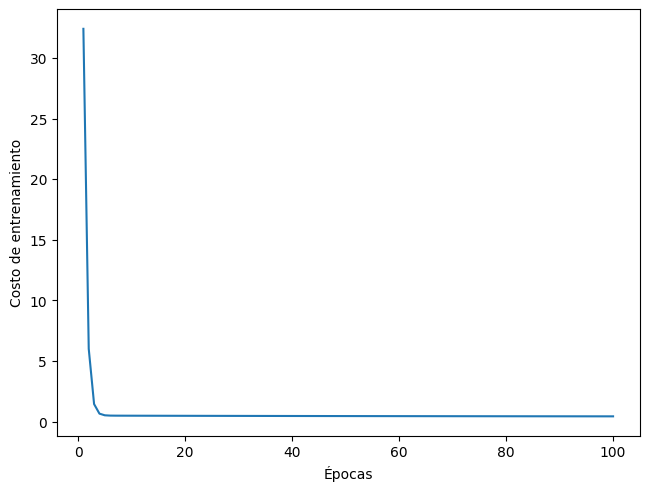

In [ ]:
# Visualizar los costes de entrenamiento
plt.plot(range(1, len(training_costs) + 1), training_costs)
plt.tight_layout()
plt.xlabel('Épocas')
plt.ylabel('Costo de entrenamiento')
plt.show()

## Ahora vamos a definir la función para realizar las predicciones tanto en TensorFlow 1.x como en 2.x

In [ ]:
#Funcion predict en TensorFlow 1.x
def predict_linreg(sess, model, X_test):
  y_pred = sess.run(model.z_net, feed_dict={model.X: X_test})
  return y_pred

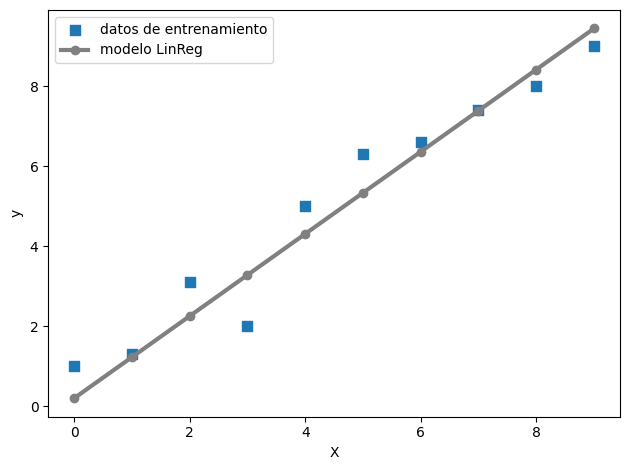

In [ ]:
plt.scatter(X_train, y_train, marker='s', s=50, label='datos de entrenamiento')
plt.plot(range(X_train.shape[0]), predict_linreg(sess, model, X_train),
         color='Gray', marker='o', markersize=6,
         linewidth=3, label='modelo LinReg')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()

### Como podemos observar, nuestro modelo ajusta adecuadamente los puntos de datos de entrenamiento.

In [ ]:
#Funcion predict en TensorFlow 2.x
def predict_linreg(model, X_test):
  y_pred = model(X_test)
  return y_pred

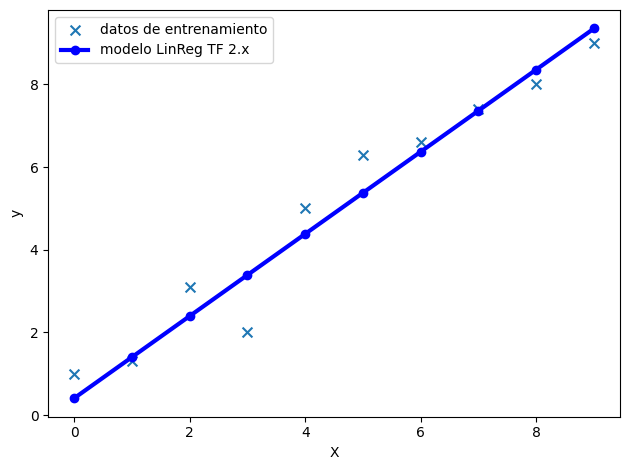

In [ ]:
plt.scatter(X_train, y_train, marker='x', s=50, label='datos de entrenamiento')
plt.plot(range(X_train.shape[0]), predict_linreg(model, X_train),
         color='Blue', marker='o', markersize=6,
         linewidth=3, label='modelo LinReg TF 2.x')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()

# Crear redes neuronales multicapa mediante la API Layers de TensorFlow

In [ ]:
import os
import numpy as np
import struct

def load_mnist(path, kind='trian'):
  """Cargar mnist desde el path"""
  labels_path = os.path.join(path, '%s-labels.idx1-ubyte'%kind)
  images_path = os.path.join(path, '%s-images.idx3-ubyte'%kind)

  with open(labels_path, 'rb') as lbpath :
    magic, n = struct.unpack('>II', lbpath.read(8))
    labels = np.fromfile(lbpath, dtype= np.uint8)
  with open(images_path, 'rb') as imgpath:
    magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
    images = np.fromfile(imgpath, dtype= np.uint8).reshape(len(labels), 784)
    images = images / 255. #El libro procesa las imagenes de esta forma ((images / 255.) - .5) *2

  return images, labels

In [ ]:
# Cargar los datos
X_train, y_train = load_mnist('', kind='train')
print('Filas: %d, columnas: %d' % (X_train.shape[0], X_train.shape[1]))

Filas: 60000, columnas: 784


In [ ]:
X_test, y_test = load_mnist('', kind='t10k')
print('Filas: %d, columnas: %d' % (X_test.shape[0], X_test.shape[1]))

Filas: 10000, columnas: 784


In [ ]:
# Centrado medio y normalización:
mean_vals = np.mean(X_train, axis=0)
std_val = np.std(X_train)
X_train_centered = (X_train - mean_vals) / std_val
X_test_centered = (X_test - mean_vals) / std_val

In [ ]:
del X_train, X_test

In [ ]:
print(X_train_centered.shape, y_train.shape)

(60000, 784) (60000,)


In [ ]:
print(X_test_centered.shape, y_test.shape)

(10000, 784) (10000,)


## Ahora vamos a comenzar a construir el modelo, empezaremos creando dos marcadores de posición tf_x y tf_y, y después un perceptrón multicapa.

In [ ]:
import tensorflow as tf
n_features = X_train_centered.shape[1]
n_clases = 10
random_seed = 42
np.random.seed(random_seed)

g = tf.Graph()
with g.as_default():
  #tf.set_random_seed(random_seed)
  tf.random.set_seed(random_seed)
  tf_x = tf.compat.v1.placeholder(dtype=tf.float32, shape=(None, n_features), name='tf_x')
  tf_y = tf.compat.v1.placeholder(dtype=tf.int32, shape=(None,), name='tf_y')
  y_onehot = tf.one_hot(indices=tf_y, depth=n_clases)
  h1 = tf.keras.layers.Dense(units=50, activation=tf.tanh, name='layer1')(tf_x)
  h2 = tf.keras.layers.Dense(units=50, activation=tf.tanh, name='layer2')(h1)
  logits = tf.keras.layers.Dense(units=10, activation=None, name='layer3')(h2)
  predictions = {
      'clasess' : tf.argmax(logits, axis=1, name='predicted_clasess'),
      'probabilities' : tf.nn.softmax(logits, name='softmax_tensor')
  }

## A continuación definimos las funciones de coste y añadimos un operador para inicializar las variables modelo, así como un operador de optimización:

In [ ]:
with g.as_default():
  #cost = tf.keras.losses.softmax_cross_entropy(onehot_labels=y_onehot, logits=logits)
  cost = tf.keras.losses.CategoricalCrossentropy()(y_onehot, logits)
  optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.001)
  train_op = optimizer.minimize(loss=cost)
  init_op = tf.compat.v1.global_variables_initializer()

## Crearemos un función que devuelve un generador para los lotes de datos

In [ ]:
def create_batch_generator(X, y, batch_size=128, shuffle=False):
  X_copy = np.array(X)
  y_copy = np.array(y)
  if shuffle:
    data = np.column_stack((X_copy, y_copy))
    np.random.shuffle(data)
    X_copy = data[:, :-1]
    y_copy = data[:, -1].astype(int)
  for i in range(0, X.shape[0], batch_size):
    yield (X_copy[i:i+batch_size, :], y_copy[i:i+batch_size])

## Vamos a crear una nueva sesión de TensorFlow, inicializr todas las variables en nuestra red y entrenarlas. También mostraremos la pérdida de entrenamiento media después de que más tarde cada época supervise el proceso de aprendizaje:  

In [ ]:
## Crear una sesión para iniciar el gráfico
sess = tf.compat.v1.Session(graph=g)
## Ejecutar el operador de inicialización de variable
sess.run(init_op)

## 50 épocas de entrenamiento.
for epoch in range(50):
  training_costs = []
  batch_generatot = create_batch_generator(X_train_centered, y_train, batch_size=64)
  for batch_X, batch_y in batch_generatot:
    # preparar un diccionario para el feed de la red
    feed = {tf_x: batch_X, tf_y: batch_y}
    _, batch_cost = sess.run([train_op, cost], feed_dict=feed)
    training_costs.append(batch_cost)
  print(f'\t\t--época {epoch+1}--\n\n \tcosto de entrenamiento: {np.mean(training_costs)}')

		--época 1--

 	costo de entrenamiento: 5.415582656860352
		--época 2--

 	costo de entrenamiento: 5.888027191162109
		--época 3--

 	costo de entrenamiento: 4.76708459854126
		--época 4--

 	costo de entrenamiento: 3.119155168533325
		--época 5--

 	costo de entrenamiento: 3.0538156032562256
		--época 6--

 	costo de entrenamiento: 2.8272671699523926
		--época 7--

 	costo de entrenamiento: 2.822052001953125
		--época 8--

 	costo de entrenamiento: 2.9658291339874268
		--época 9--

 	costo de entrenamiento: 3.2382726669311523
		--época 10--

 	costo de entrenamiento: 3.164504289627075
		--época 11--

 	costo de entrenamiento: 3.3497307300567627
		--época 12--

 	costo de entrenamiento: 3.090333938598633
		--época 13--

 	costo de entrenamiento: 2.8664748668670654
		--época 14--

 	costo de entrenamiento: 2.6092681884765625
		--época 15--

 	costo de entrenamiento: 2.570854425430298
		--época 16--

 	costo de entrenamiento: 2.559319496154785
		--época 17--

 	costo de entrenamiento: 2

## Hacer predicciones en el conjunto de pruebas:

In [ ]:
feed = {tf_x: X_test_centered}
y_pred = sess.run(predictions['clasess'], feed_dict=feed)
print(f'test Accuracy: {100*np.sum(y_pred == y_test)/y_test.shape[0]}')

test Accuracy: 8.78


In [ ]:
# Código anteriro refactorizado para tensorFlow 2.x
import tensorflow as tf
import numpy as np

# Inicializar parámetros
n_features = X_train_centered.shape[1]
n_clases = 10
random_seed = 42
np.random.seed(random_seed)

# Definir el modelo utilizando la API de Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=50, activation='tanh', input_shape=(n_features,)),
    tf.keras.layers.Dense(units=50, activation='tanh'),
    tf.keras.layers.Dense(units=n_clases, activation=None)
])

# Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Convertir las etiquetas a one-hot encoding
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=n_clases)

# Entrenar el modelo
history = model.fit(X_train_centered, y_train_onehot, epochs=50, batch_size=64, verbose=1)

# Evaluar el modelo en el conjunto de prueba
y_pred = model.predict(X_test_centered)
y_pred_classes = np.argmax(y_pred, axis=1)
test_accuracy = np.sum(y_pred_classes == y_test) / y_test.shape[0]

print(f'Test Accuracy: {100 * test_accuracy:.2f}%')


# Desarrollar una red multicapa con keras

## Keras poseé una Api muy intuitiva y fácil de usar, que nos permite implemetar redes neuronales con solo uas cuantas líneas de código.  

In [ ]:
import tensorflow as tf
import numpy as np
import tensorflow.keras as keras

In [ ]:
# Establecer disposició aleatoria para tensorflow y numpy.
np.random.seed(42)
tf.random.set_seed(42)

### A continuación necesitamos convertir las etiquetas de clase(enteros del 0 al 9) al formato *one-hot*. Keras proporciona para ello una sencilla herramienta.  

In [ ]:
y_train_one_hot = keras.utils.to_categorical(y_train)
y_test_one_hot = keras.utils.to_categorical(y_test)

In [ ]:
# Imprimir las 3 primeras etiquetas.
print(f'Primeras 3 etiquetas de entrenamiento: {y_train[:3]}')
print(f'Primeras 3 etiquetas de entrenamiento one-hot: {y_train_one_hot[:3]}')

Primeras 3 etiquetas de entrenamiento: [5 0 4]
Primeras 3 etiquetas de entrenamiento one-hot: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### Ahora vamos a implementar una red neuronal de tres capas; cada una de las primeras dos tendrá 50 unidades ocultas con la función de activaación *tanh* y la última tendrá 10 capas para las etiquetas de clase y utilizará *softmax* para dar la probabilidad de cada clase.  

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(units=50, activation='tanh', input_dim=X_train_centered.shape[1],
                             kernel_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(keras.layers.Dense(units=50, activation='tanh', input_dim=X_train_centered.shape[1],
                             kernel_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(keras.layers.Dense(units=y_train_one_hot.shape[1], input_dim=50, kernel_initializer='glorot_uniform', bias_initializer='zeros',
                             activation='softmax'))
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.001, decay=1e-7, momentum=.9)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


### Inicializamos un nuevo modelo utilizando la clase *sequential* para implementar una red neuronal prealimentada. En la primera capa tenemos que asegurarnos que el atributo *input_dim* coincide conn el número de características (columnas) en el conjunto de entrenamiento (784 caraterísticas o pixeles en la implementación de la red neuronal).
### Además, debemos estar seguros que el número de unidades de salida(units) y de entrada(input_dim) de dos capas consecutivas coinciden.  

In [ ]:
history = model.fit(X_train_centered, y_train_one_hot, batch_size=64, epochs=50, verbose=1, validation_split=0.1)

Epoch 1/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1.0973 - val_loss: 0.3526
Epoch 2/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3887 - val_loss: 0.2681
Epoch 3/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3107 - val_loss: 0.2323
Epoch 4/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2714 - val_loss: 0.2105
Epoch 5/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2450 - val_loss: 0.1951
Epoch 6/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2250 - val_loss: 0.1834
Epoch 7/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2090 - val_loss: 0.1739
Epoch 8/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1956 - val_loss: 0.1660
Epoch 9/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1840 - val_loss: 0.1593
Epoch 10/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1737 - val_loss: 0.1535
Epoch 11/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1645 - val_loss: 0.1485
Epoch 12/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

In [ ]:
y_train_pred_probs = model.predict(X_train_centered, verbose=0)  # Get predicted probabilities
y_train_pred = np.argmax(y_train_pred_probs, axis=1)  # Convert probabilities to class labels

print(f'Primeras tres predicciones del conjunto de entrenamiento: {y_train_pred[:3]}')

Primeras tres predicciones del conjunto de entrenamiento: [5 0 4]


In [ ]:
correct_preds = np.sum(y_train == y_train_pred, axis=0)
train_acc = correct_preds / y_train.shape[0]
print(f'Precisión de entrenamiento: {train_acc*100:.2f}%')

Precisión de entrenamiento: 98.93%


In [ ]:
y_test_pred = model.predict(X_test_centered, verbose=0)
correct_preds = np.sum(y_test == np.argmax(y_test_pred, axis=1), axis=0)
test_acc = correct_preds / y_test.shape[0]
print(f'Precisión de prueba: {test_acc*100:.2f}%')

Precisión de prueba: 96.04%
